# Model selection 

Import modules

In [28]:
import os
import sys
import pickle
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import warnings

Unpickle clean df and target and store as X and y

In [3]:
with open('../data/processed/df_clean.pickle', 'rb') as file:
    X = pickle.load(file)

with open('../data/processed/target.pickle', 'rb') as file:
    y = pickle.load(file)

Print shape of X and y 

In [4]:
print('Predictor shape:', X.shape, '\n',
      'Target shape:', y.shape, '\n')

Predictor shape: (39644, 51) 
 Target shape: (39644,) 



Split data into X and y train and test sets stratifying by the target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y)

Create scaler object and fit to both train and test X sets

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Create scikit-learn K-Nearest Neighbors object and Random Forest object  

In [8]:
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=100)

Fit the models to the training data 

In [9]:
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Use models to make predictions on training data 

In [10]:
y_hat_knn = knn.predict(X_train)
y_hat_rf = rf.predict(X_train)

Evaluate performance of models on training predictions and print accuracy scores

In [13]:
score_knn = accuracy_score(y_train, y_hat_knn)
score_rf = accuracy_score(y_train, y_hat_rf)
print('KNN test score:', round(score_knn, 3))
print('RF test score:', round(score_rf, 5))

KNN test score: 0.861
RF test score: 0.99997


Create pipeline to scale then call model for knn and random forest

In [14]:
knn_pipe = Pipeline([('scale', StandardScaler()),
                     ('knn', KNeighborsClassifier())
                    ])
rf_pipe = Pipeline([('scale', StandardScaler()),
                    ('rf', RandomForestClassifier())
                   ])

Cross validate training data using knn and print accuracy score

In [15]:
scores_knn = cross_val_score(knn_pipe, X_train, y_train, cv=5, scoring='accuracy')
print('KNN scores:', scores_knn, '\n')

KNN scores: [0.84032156 0.84124231 0.83998108 0.83919281 0.84074424] 



Cross validate training data using Random Forest and print accuracy score

In [17]:
scores_rf = cross_val_score(rf_pipe, X_train, y_train, cv=5, scoring='accuracy')
print('Random forest scores:', scores_rf)
warnings.filterwarnings('ignore')

/Users/alyssaliguori/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/alyssaliguori/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/alyssaliguori/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/alyssaliguori/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/alyss

Random forest scores: [0.85277427 0.85290872 0.85338168 0.85290872 0.85257017]


Print mean accuracy score from knn and random forest

In [18]:
print('knn cv mean:', scores_knn.mean(),'\n',
      'rf cv mean:', scores_rf.mean())

knn cv mean: 0.8402964030484323 
 rf cv mean: 0.8529087118364254


Inspect features importance

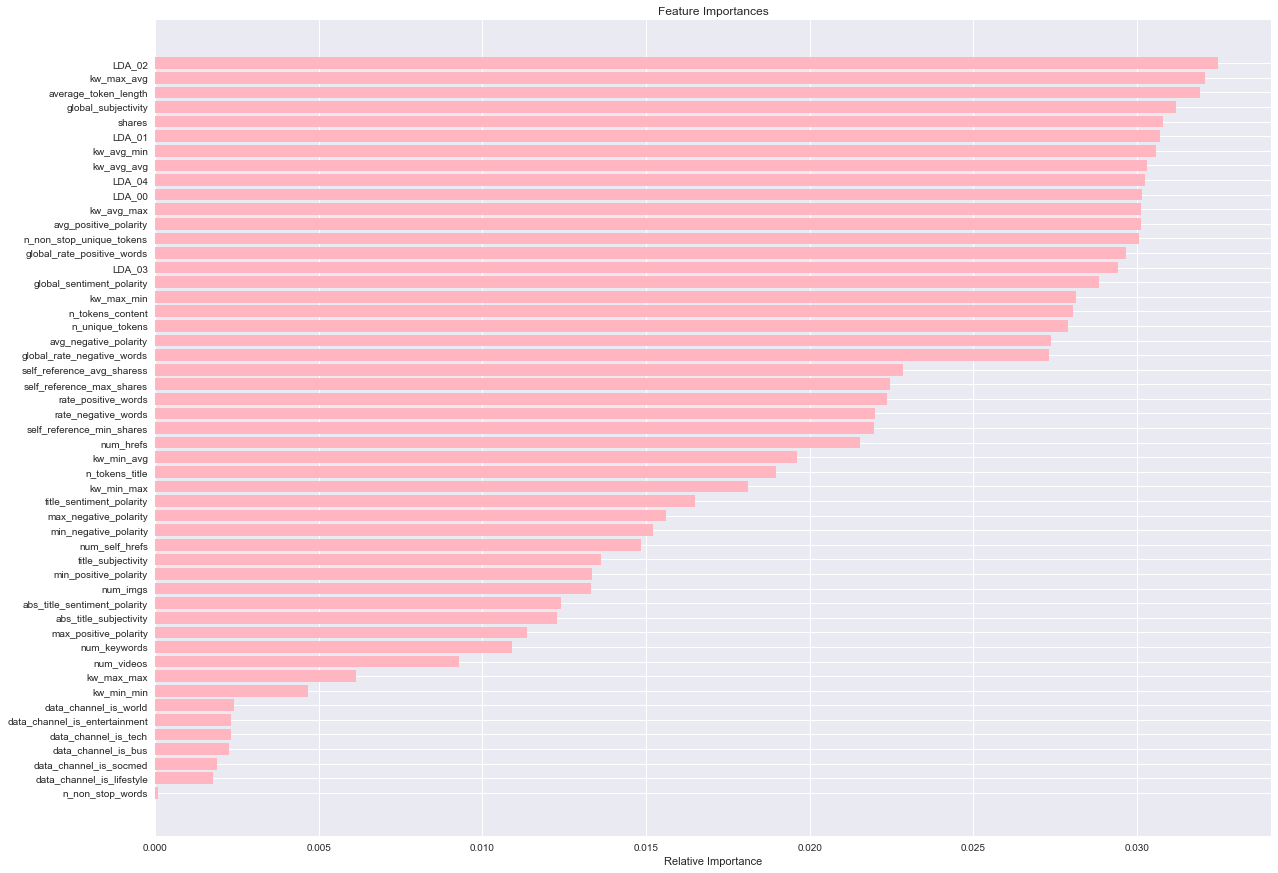

In [56]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=[20,15])
plt.barh(range(len(indices)), importances[indices], color='lightpink')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.style.use('seaborn')
plt.show()

Create dictionary of parameters to search 

In [57]:
param_grid = {
    'n_estimators': [10, 100, 250],
    'max_depth': [2, 3, 5, 7],
    'oob_score': [True],
    'max_features': [None]
}

Do a gridsearch on the parameter grid to find best params with cross-validation 

In [ ]:
search = GridSearchCV(rf, param_grid, scoring='accuracy',
                      n_jobs=-1, iid=False, cv=5, verbose=1)

search.fit(X_train, y_train)
y_hat_search = search.predict(X_train)
score = accuracy_score(y_train, y_hat_search)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.4min


View best parameters from the gridsearch

In [ ]:
search.best_params_